In [1]:
!pyenv activate q3-scam-spotter


Failed to activate virtualenv.

Perhaps pyenv-virtualenv has not been loaded into your shell properly.
Please restart current shell and try again.



In [2]:
import tensorflow as tf
from tensorflow import keras
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
import time
import string
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from io import BytesIO

2022-12-07 19:58:14.601208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-07 19:58:14.601222: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
from nltk.corpus import stopwords 
import string
from nltk import word_tokenize 
import nltk
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import gensim.downloader as api
from keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/lscr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd
import numpy as np

In [5]:
!pwd

/home/lscr/code/2022-q3-wagon-projects/Scam_Spotter/notebooks/modelling/multi-input


In [6]:
new_model = tf.keras.models.load_model('../../../saved_models/dual_feed_model')

2022-12-07 19:58:16.828668: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-07 19:58:16.828684: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-07 19:58:16.828694: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lscr): /proc/driver/nvidia/version does not exist
2022-12-07 19:58:16.828846: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 19:58:18.531367: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 1

In [7]:
url='http://cuf.creditunionandfinance.com/'


In [8]:
def clean1 (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    lowercased=lowercased.replace('\n','')
    return lowercased

In [9]:
def get_photo_text(url):
    
    # initialisation of the webdriver 
    options = Options()
    options.headless = True
    options.add_argument("--start-maximized")
    driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
    driver.get(url)
    
    # taking the screenshot
    screenshot = driver.get_screenshot_as_png()
    screenshot = Image.open(BytesIO(screenshot))
    screenshot = np.array(screenshot.resize((400, 300), Image.Resampling.BILINEAR))[:, :, :3]
    screenshot = screenshot/255.

    # scrape the text
    text = driver.find_elements( by = "tag name", value = "body")
    final1 = text[0].get_attribute("innerText")
    final_text=clean1(final1)

    return final_text, screenshot 

In [10]:
text, image = get_photo_text(url)

/tmp/ipykernel_75395/1332840515.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)


In [11]:
image.max()

1.0

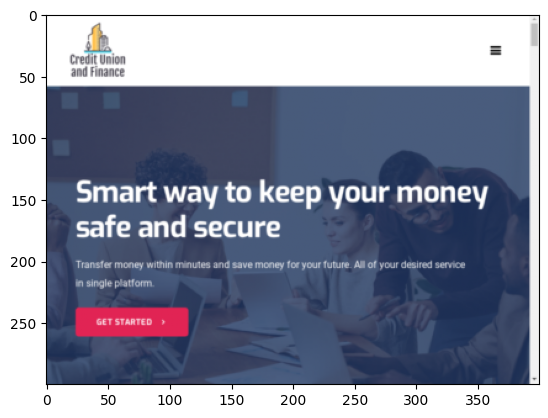

In [12]:
plt.imshow(image)

In [13]:
def clean(text):
    text = text.split()
    words_only = [word for word in text if word.isalpha()]
    for punctuation in string.punctuation:
        words_only = [word.replace(punctuation, ' ').lower() for word in words_only] # Remove Punctuation
    # lowercased = text.lower() # Lower Case
    #tokenized = word_tokenize(lowercased) # Tokenize
    # words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    # lemma=WordNetLemmatizer() # Initiate Lemmatizer
    # lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    return without_stopwords

def text_cleaner(list_text):
    list_clean_text=[]
    for text in list_text:
        #print(text)
        cleen_txt=clean(text)#[0]
        list_clean_text.append(cleen_txt)
        #print(list_clean_text)
    return list_clean_text

def embed_sentence_with_TF(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec:
            embedded_sentence.append(word2vec[word])
        
    return np.array(embedded_sentence)

# Function that converts a list of sentences into a list of matrices
def embedding(word2vec, sentences):
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence_with_TF(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed


def preprocess_pad(list_text):
    list_ = text_cleaner(list_text)
    
    word2vec_transfer = api.load('glove-wiki-gigaword-100')
    
    list_ = embedding(word2vec_transfer, list_)
    list_ = pad_sequences(list_, dtype='float32', padding='post', maxlen=200)
    return list_
        

In [14]:
text_train=preprocess_pad([text])

In [18]:
text_train

numpy.ndarray

In [16]:
prediction = new_model.predict([test_image, text_train])

NameError: name 'test_image' is not defined

In [ ]:
prediction